In [1]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from PIL import Image, ImageOps
from tensorflow.keras.utils import to_categorical

dirpath='/Users/anuli/Documents/UTKFace/'
allimages=os.listdir(dirpath)


race=[]
images=[]
gender=[]

for Y in range(len(allimages)):
    demos = allimages[Y].split('_')
    if(int(demos[2])==0):
        images.append(allimages[Y])
        race.append(int(demos[2]))
        gender.append(int(demos[1]))
            

df = pd.DataFrame()
df['image'], df['race'], df['gender']= images, race, gender
df.head()

,image,race,gender
0,86_1_0_20170120225751953.jpg.chip.jpg,0,1
1,26_1_0_20170116171048641.jpg.chip.jpg,0,1
2,25_1_0_20170117134403373.jpg.chip.jpg,0,1
3,16_0_0_20170104003740977.jpg.chip.jpg,0,0
4,6_1_0_20170114024512634.jpg.chip.jpg,0,1


In [2]:
def extraction(images):

    features = []

    for img in images:
        pic = Image.open(dirpath+img)
        pic = ImageOps.grayscale(pic)
        pic = pic.resize((128,128))
        pic = np.array(pic)
        features.append(pic)
    features = np.array(features)
    features = features.reshape(len(features), 16384)
    return features

In [3]:
features = extraction(df['image'])

In [4]:
age=np.array(df['gender']).astype(float)

input_shape = (128,128,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, age, train_size=0.7, stratify = gender, shuffle = True, random_state=2)
print(x_train.shape)
print(x_test.shape)

(7054, 16384)
(3024, 16384)


[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]


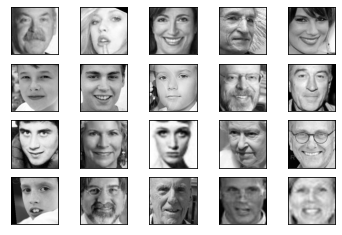

In [5]:
for i in range(20):
  X_img = x_train[i].reshape(128,128)
  plt.subplot(4,5,i+1)
  fig = plt.imshow(X_img,cmap='gray')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

print(y_train[0:20])
plt.show()  

x_train = (x_train.astype('float32')/255).reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = (x_test.astype('float32')/255).reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
np.random.seed(0)
hiddenSize1 = 100

In [7]:
in_size = 16384
in_img = keras.Input(shape=(in_size,)) 
encoded = layers.Dense(hiddenSize1, activation='sigmoid',name='Encoder')(in_img) # Encoder Layer
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)  # decoder layer

autoencoder = keras.Model(in_img, decoded)

encoder = keras.Model(in_img, encoded)

autoencoder.compile(optimizer='adam', loss='MeanSquaredError')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
28/28 [==============================] - 2s 53ms/step - loss: 0.0440
Epoch 2/50
28/28 [==============================] - 1s 52ms/step - loss: 0.0415
Epoch 3/50
28/28 [==============================] - 1s 52ms/step - loss: 0.0402
Epoch 4/50
28/28 [==============================] - 1s 53ms/step - loss: 0.0390
Epoch 5/50
28/28 [==============================] - 2s 55ms/step - loss: 0.0378
Epoch 6/50
28/28 [==============================] - 2s 55ms/step - loss: 0.0367
Epoch 7/50
28/28 [==============================] - 2s 54ms/step - loss: 0.0356
Epoch 8/50
28/28 [==============================] - 2s 54ms/step - loss: 0.0346
Epoch 9/50
28/28 [==============================] - 2s 54ms/step - loss: 0.0337
Epoch 10/50
28/28 [==============================] - 2s 55ms/step - loss: 0.0329
Epoch 11/50
28/28 [==============================] - 2s 57ms/step - loss: 0.0322
Epoch 12/50
28/28 [==============================] - 2s 58ms/step - loss: 0.0317
Epoch 13/50
28/28 [==================

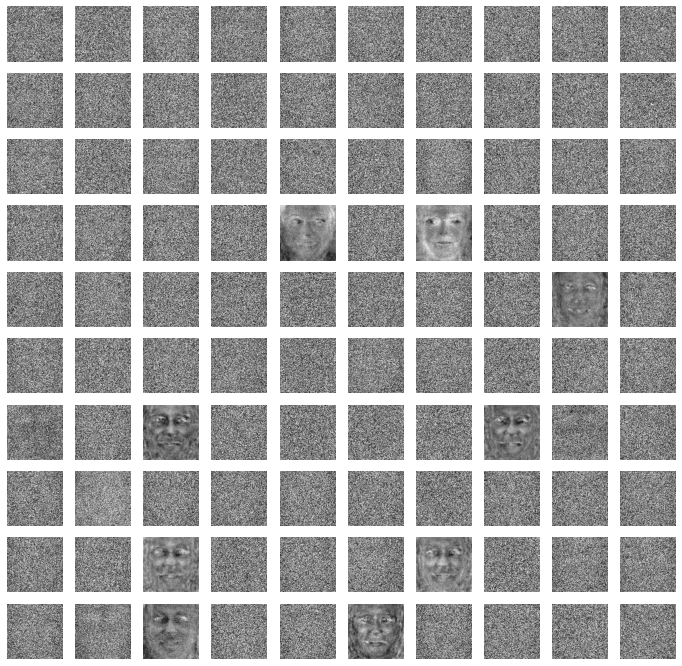

In [9]:
import math
n_cols = math.ceil(hiddenSize1 / 10)
fig = plt.figure(figsize=(12,12))


for i in range(hiddenSize1):
  w = autoencoder.layers[1].get_weights()[0][:,i].reshape(128,128)
  plt.subplot(n_cols, 10, i+1)
  plt.imshow(w,cmap='gray')
  plt.axis("off")
  
plt.show()

In [10]:
feat1 = encoder.predict(x_train)
hiddenSize2 = 25

221/221 [==============================] - 1s 2ms/step


In [11]:
in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')


autoencoder2.fit(feat1, feat1, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
28/28 [==============================] - 0s 2ms/step - loss: 0.2108
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 0.1282
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 8/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 9/50
28/28 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 10/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 11/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 12/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 13/50
28/28 [==============================

In [13]:
feat2 = encoder2.predict(feat1)

221/221 [==============================] - 0s 630us/step


In [14]:
soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(2,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
28/28 [==============================] - 0s 915us/step - loss: 0.3265
Epoch 2/50
28/28 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 3/50
28/28 [==============================] - 0s 996us/step - loss: 0.2548
Epoch 4/50
28/28 [==============================] - 0s 1ms/step - loss: 0.2542
Epoch 5/50
28/28 [==============================] - 0s 943us/step - loss: 0.2539
Epoch 6/50
28/28 [==============================] - 0s 1ms/step - loss: 0.2536
Epoch 7/50
28/28 [==============================] - 0s 930us/step - loss: 0.2532
Epoch 8/50
28/28 [==============================] - 0s 989us/step - loss: 0.2529
Epoch 9/50
28/28 [==============================] - 0s 954us/step - loss: 0.2526
Epoch 10/50
28/28 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 11/50
28/28 [==============================] - 0s 1ms/step - loss: 0.2520
Epoch 12/50
28/28 [==============================] - 0s 997us/step - loss: 0.2518
Epoch 13/50
28/28 [================

In [16]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)
print(y_test)
y_classified

95/95 [==============================] - 0s 703us/step
[0. 0. 0. ... 1. 0. 1.]


array([0, 1, 0, ..., 1, 0, 1])

In [17]:
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(2, activation='softmax')(layer2)

stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")

stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

In [19]:
import seaborn as sn
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((2,2))
  for i in range(len(y_true)):
    c_mat[y_classified[i], int(y_true[i])] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

95/95 [==============================] - 0s 2ms/step


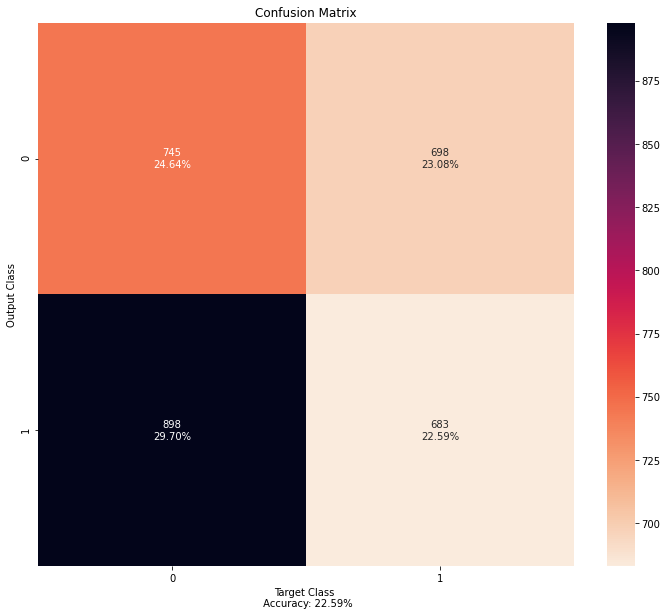

In [20]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

In [22]:
## Fine tuning the stacked neural network
# The results for the stacked neural network can be improved by performing
# backpropagation on the whole multilayer network. This process is often
# referred to as fine tuning.
#
# You fine tune the network by retraining it on the training data in a
# supervised fashion

stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)

Epoch 1/20
28/28 [==============================] - 0s 15ms/step - loss: 0.1068
Epoch 2/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1108
Epoch 3/20
28/28 [==============================] - 0s 15ms/step - loss: 0.1099
Epoch 4/20
28/28 [==============================] - 0s 15ms/step - loss: 0.1050
Epoch 5/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1070
Epoch 6/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1043
Epoch 7/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1019
Epoch 8/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1025
Epoch 9/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1013
Epoch 10/20
28/28 [==============================] - 0s 15ms/step - loss: 0.1045
Epoch 11/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1080
Epoch 12/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0954
Epoch 13/20
28/28 [==================

95/95 [==============================] - 0s 3ms/step


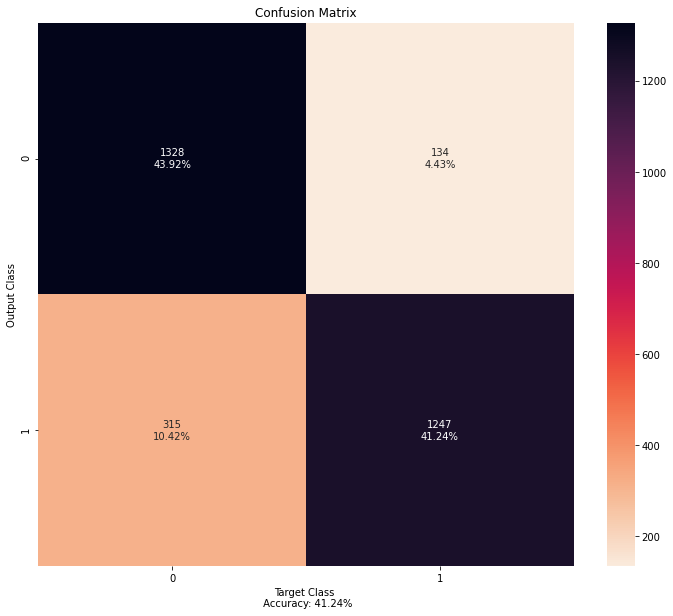

In [23]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0933
Epoch 2/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0889
Epoch 3/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1025
Epoch 4/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0900
Epoch 5/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0876
Epoch 6/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0886
Epoch 7/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0929
Epoch 8/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0868
Epoch 9/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0894
Epoch 10/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0927
Epoch 11/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0943
Epoch 12/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0839
Epoch 13/20
28/28 [==================

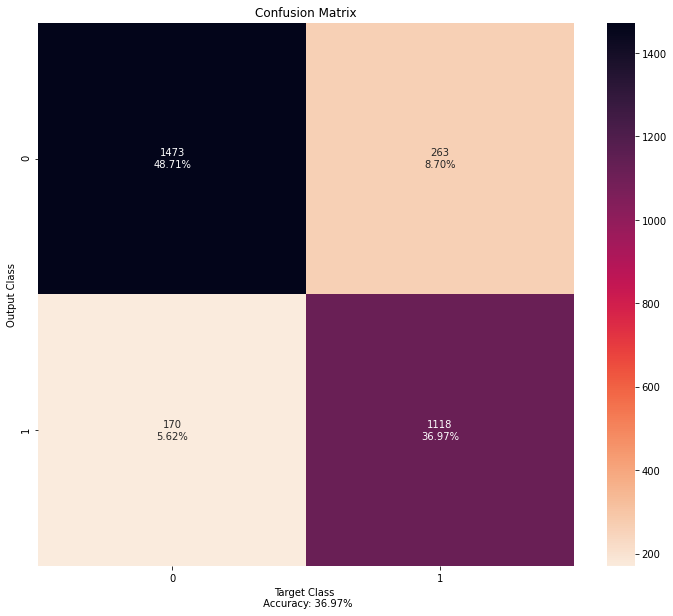

In [24]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0853
Epoch 2/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0826
Epoch 3/20
28/28 [==============================] - 0s 16ms/step - loss: 0.1032
Epoch 4/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0878
Epoch 5/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0871
Epoch 6/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0851
Epoch 7/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0873
Epoch 8/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0800
Epoch 9/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0810
Epoch 10/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0827
Epoch 11/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0784
Epoch 12/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0780
Epoch 13/20
28/28 [==================

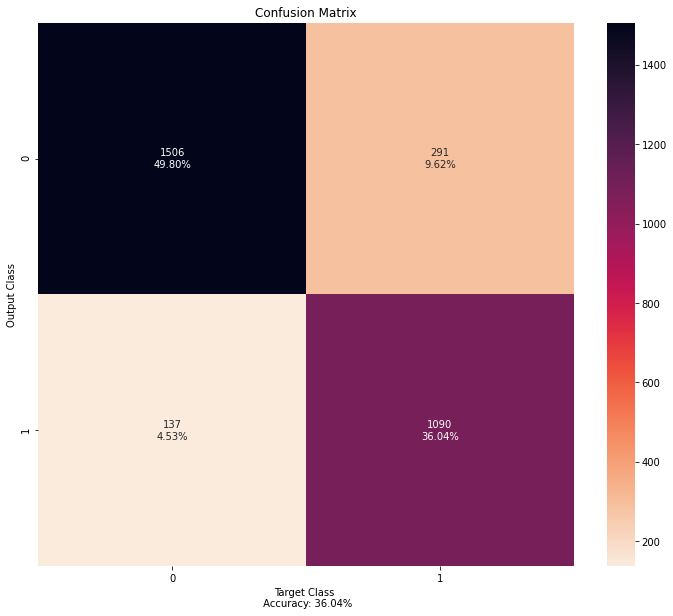

In [25]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)